In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, date
import re
from IPython.display import display, HTML
from tabulate import tabulate

In [295]:
file_path='E:/Metro2/raw_data//'
df=pd.read_csv(file_path+'Data.csv')

In [296]:
for column in df.select_dtypes(include='object').columns:
    if re.match(r'^12c\([a-e]\)$', column):
        df[column] = df[column].apply(lambda x: 'Will use for both trips' if ',' in x else x)
    df[column] = df[column].str.replace(r'\(.*\)', '', regex=True)


In [297]:
df['1'].unique()

array(['Tulasi ', 'Vasundhara N ', 'Vasundhara N', 'Tulasi NS ', 'Tulasi',
       'Keerthi M ', 'Sneha', 'Sneha ', 'Ruthu', 'Ruthu m', 'Ruthu m ',
       'HAMIM SADIQUE', 'HAMIM SADIQUE ', 'tulasi ', 'Gayathri Krija ',
       'Anshu', 'Gayathri Krija', 'sneha', 'HARIPRASAD ', 'Govardhan G ',
       'Hari Prasad ', 'HariPrasad h', 'HariPrasad ', 'HariPrasad h '],
      dtype=object)

In [298]:
name_dict = {'Tulasi ':'Tulasi', 'Vasundhara N ': 'Vasundhara N', 'Tulasi NS ':'Tulasi',
        'Varad ':'varad', 'Varad Verma ':'varad', 'Varad Verm ':'varad',
       'Varad. Verma ':'varad', 'Varad Verma':'varad', 'Varad verma':'varad','Sneha ':'Sneha',
       'HAMIM SADIQUE ':'HAMIM','HAMIM SADIQUE':'HAMIM','Gayathri Krija ':'Gayathri','tulasi ':'Tulasi',
       'Ruthu m':'Ruthu','Ruthu m ':'Ruthu','sneha':'Sneha','HariPrasad h':'HariPrasad','Hari Prasad ':'HariPrasad','HARIPRASAD ':'HariPrasad',
       'HariPrasad ':'HariPrasad','Govardhan G ':'Govardhan','Gayathri Krija':'Gayathri','HariPrasad h ':'HariPrasad'}

# map column 1 names to the above name_dict
df['1'] = df['1'].map(name_dict).fillna(df['1'])

print(df['1'].unique(),df.shape[0])

['Tulasi' 'Vasundhara N' 'Keerthi M ' 'Sneha' 'Ruthu' 'HAMIM' 'Gayathri'
 'Anshu' 'HariPrasad' 'Govardhan'] 662


In [299]:
display(HTML(f"<h2>Number of instances where income is not collected</h0>"))
# Filter rows where column '21' is NA
filtered_df = df[df['21'].isna()]

# Group by column '1' and count the instances where column '21' is NA
result = filtered_df.groupby('1').size().reset_index(name='Count')

# Calculate the total number of occurrences for each unique entry in column '1'
total_counts = df.groupby('1').size().reset_index(name='Total')

# Merge the total counts with the NA counts
merged_df = pd.merge(result, total_counts, on='1')

# Calculate the percentage of instances where column '21' is missing
merged_df['Percentage'] = round((merged_df['Count'] / merged_df['Total']) * 100,2)

# Customize column names
merged_df.columns = ['Intern', '# Instances', 'Total samples', 'Percentage']

# Set index to start from 1 for entries
merged_df.index += 1

# Convert DataFrame to tabular form
table = tabulate(merged_df, headers='keys', tablefmt='pretty', showindex=False)

# Print the table
print(table)

+--------------+-------------+---------------+------------+
|    Intern    | # Instances | Total samples | Percentage |
+--------------+-------------+---------------+------------+
|    Anshu     |      1      |      64       |    1.56    |
|   Gayathri   |      3      |      39       |    7.69    |
|  Govardhan   |      2      |      22       |    9.09    |
|    HAMIM     |     22      |      32       |   68.75    |
|    Ruthu     |      2      |      63       |    3.17    |
|    Sneha     |      1      |      76       |    1.32    |
| Vasundhara N |     86      |      169      |   50.89    |
+--------------+-------------+---------------+------------+


In [300]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')
df['day'] = df['Timestamp'].dt.day
df['date'] = df['Timestamp'].dt.strftime('%d-%m-%Y')
df['Time stamp time'] = pd.to_datetime(df['Timestamp']).apply(lambda x: x.time())
df['Start time of survey']=pd.to_datetime(df['Start time of survey'])
df['Start time of survey'] = df['Start time of survey'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))


C:\Users\PC\AppData\Local\Temp\ipykernel_191828\3492201862.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start time of survey']=pd.to_datetime(df['Start time of survey'])


In [301]:
display(HTML(f"<h2>Dates of survey done by each intern</h0>"))

sorted_names = sorted(df['1'].unique())

# Find the length of the longest name for uniform spacing
max_name_length = max(len(name) for name in sorted_names)

# Print the names and their corresponding unique dates with proper spacing
for name in sorted_names:
    unique_dates = sorted(df[df['1'] == name]['date'].unique())
    dates_str = ', '.join(unique_dates)
    count = len(unique_dates)
    print(f"{name:<{max_name_length}} ({count}) : {dates_str}")

Anshu        (4) : 06-05-2024, 07-05-2024, 18-05-2024, 19-05-2024
Gayathri     (2) : 06-05-2024, 07-05-2024
Govardhan    (3) : 08-05-2024, 09-05-2024, 20-05-2024
HAMIM        (2) : 05-05-2024, 10-05-2024
HariPrasad   (3) : 08-05-2024, 09-05-2024, 20-05-2024
Keerthi M    (10) : 01-05-2024, 02-05-2024, 03-05-2024, 05-05-2024, 08-05-2024, 10-05-2024, 11-05-2024, 12-05-2024, 17-05-2024, 18-05-2024
Ruthu        (6) : 05-05-2024, 08-05-2024, 10-05-2024, 17-05-2024, 18-05-2024, 20-05-2024
Sneha        (6) : 02-05-2024, 03-05-2024, 07-05-2024, 08-05-2024, 17-05-2024, 20-05-2024
Tulasi       (5) : 01-05-2024, 02-05-2024, 03-05-2024, 04-05-2024, 05-05-2024
Vasundhara N (13) : 01-05-2024, 02-05-2024, 03-05-2024, 04-05-2024, 05-05-2024, 08-05-2024, 11-05-2024, 12-05-2024, 17-05-2024, 18-05-2024, 19-05-2024, 20-05-2024, 21-05-2024


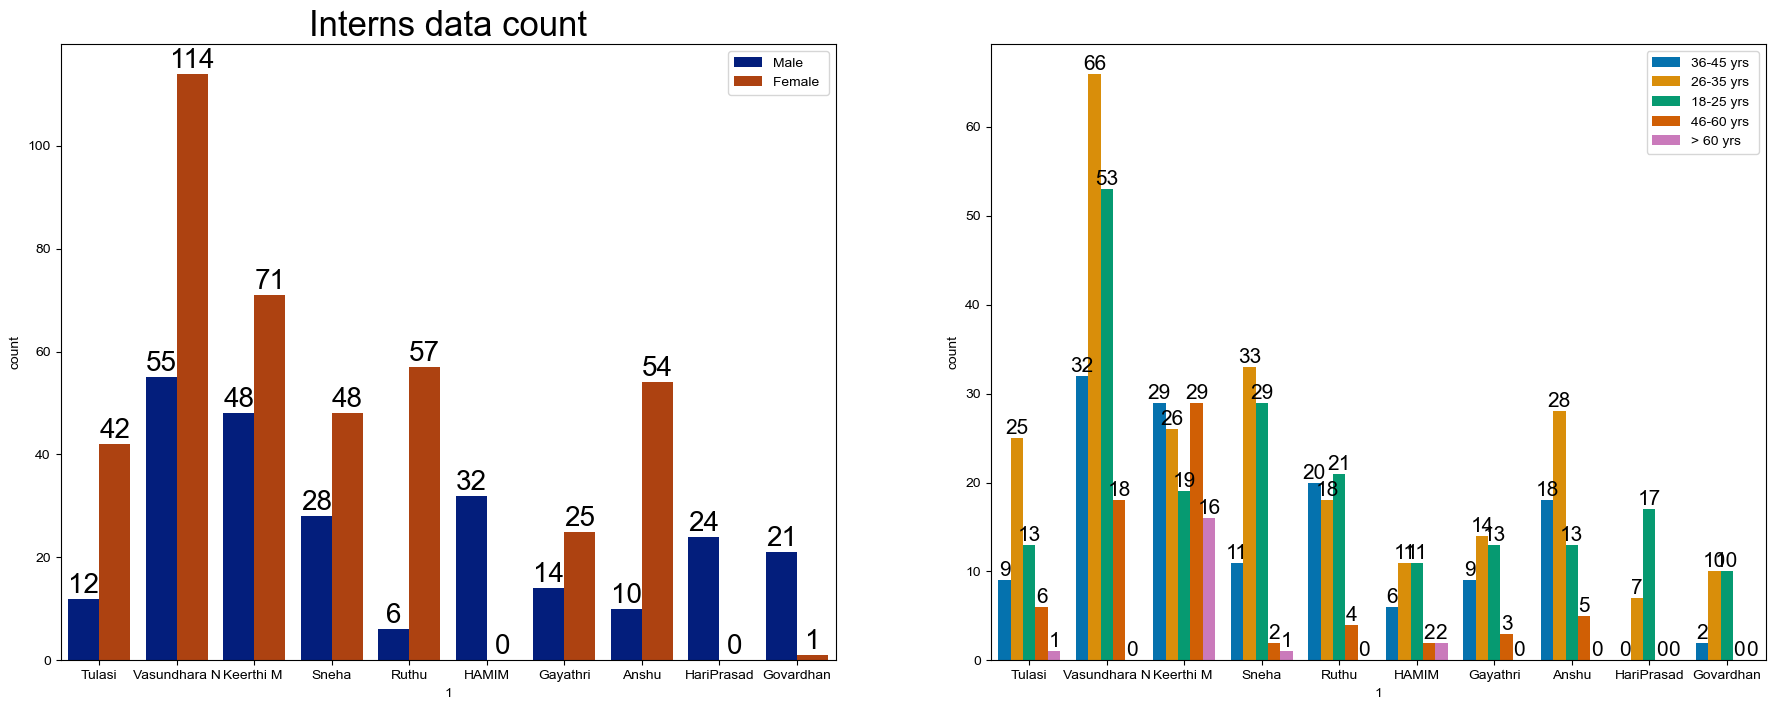

In [302]:
plt.rcParams['font.family'] = 'Arial'
f,ax=plt.subplots(1,2,figsize=(22,8))
sns.countplot(x=df['1'],data=df,palette = 'dark',hue='17',saturation=0.95,ax=ax[0])
ax[0].set_title('Interns data count',color='black',size=25)
ax[0].legend()
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
sns.countplot(x=df['1'],data=df,palette = 'colorblind',hue='18',saturation=0.95,ax=ax[1])
ax[1].legend()
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)   


In [303]:
# lets get the value count of each unique value of combination of column 3 and column date for each unique value of 1
grouped = df.groupby(['1', '3', 'date']).size()

# Reset the index to convert the Series back to a DataFrame
result = grouped.reset_index(name='count')

# Filter the results where count is greater than 3
filtered_result = result[result['count'] > 1]

print(filtered_result)

              1                                           3        date  count
80     Gayathri                        Kengeri Bus terminal  07-05-2024      2
127       HAMIM                                      560013  10-05-2024      2
133       HAMIM                                      560062  05-05-2024      2
134       HAMIM                                      560062  10-05-2024      2
214  Keerthi M   Isckon temple west chord road Mahalakshmi   05-05-2024      2
230  Keerthi M                        M chinnaswamy stadium  18-05-2024      2
261  Keerthi M                   RV college of engineering   05-05-2024      2
300       Ruthu                        Banshankarsi temple   17-05-2024      2
301       Ruthu                        Banshankarsi temple   18-05-2024      2
338       Ruthu                           National College   17-05-2024      2
340       Ruthu                           National College   20-05-2024      2
357       Sneha                          Banshankari

In [304]:
df['23'].unique()

array(['No, I will not use a bicycle. ',
       'Current travelling conditions with no special cycling facility. Per Trip cost 0₹. Parking cost of 10₹ per day. ',
       'If a marked cycle lane is provided. Per Trip cost 1₹. Parking cost 10₹ per day. ',
       'Not Applicable- because neither of my trip end is home. ',
       'If a marked cycle lane provided along with bicycle traffic signals is provided. Per Trip cost 2₹. Parking cost 10₹ per day. ',
       'If a segregated cycle track is provided. Per Trip cost 3₹.. Parking cost 10₹ per day. ',
       'If a segregated cycle track with bicycle signal is provided. Per Trip cost 4₹. Parking cost 10₹ per day. ',
       'If a segregated cycle track provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 4₹ . .                                                                                                                                                 

In [305]:
parking_dict={'No, I will not use a bicycle. ':'Will not use',
       'Current travelling conditions with no special cycling facility. Per Trip cost 0₹. Parking cost of 10₹ per day. ':'Current conditions',
       'If a marked cycle lane is provided. Per Trip cost 1₹. Parking cost 10₹ per day. ':'Marked lane',
       'Not Applicable- because neither of my trip end is home. ':'NA',
       'If a marked cycle lane provided along with bicycle traffic signals is provided. Per Trip cost 2₹. Parking cost 10₹ per day. ':'Marked lane + signal',
       'If a segregated cycle track is provided. Per Trip cost 3₹.. Parking cost 10₹ per day. ':'Segregated track',
       'If a segregated cycle track with bicycle signal is provided. Per Trip cost 4₹. Parking cost 10₹ per day. ':'Segregated track + signal'}

df['23']=df['23'].map(parking_dict).fillna(df['23'])

In [306]:
df['23'].unique()

array(['Will not use', 'Current conditions', 'Marked lane', 'NA',
       'Marked lane + signal', 'Segregated track',
       'Segregated track + signal',
       'If a segregated cycle track provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 4₹ . .                                                                                                                                                                     .',
       'If a segregated cycle track is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 3₹ .',
       'If a marked cycle lane is provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 2₹.  ',
       'If a marked cycle lane is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 1₹. ',
       'Current t

In [307]:
display(HTML(f"<h2>Origin and destination both are not home and response to Q23 was recorded as willing to use their own bicycle</h2>"))

In [308]:
# lets get the count of number of instances for each unique value of column 1 where when column 4 and column 6 both are not equal to Home and also column 23 
# is not equal to NA
print(df[(df['4']!='Home ') & (df['6']!='Home ') & (df['23']!='NA')]['1'].value_counts())

1
Keerthi M       18
Anshu            6
HAMIM            5
Govardhan        3
Vasundhara N     2
Tulasi           2
Gayathri         2
Sneha            1
Name: count, dtype: int64


In [309]:
display(HTML(f"<h2>Check of qualification with age </h2>"))   

In [321]:
# lets see the value counts of each value in column 19 for each unique entry of column 18
df.groupby('18')['19'].value_counts()

result = grouped_value_counts.reset_index(name='count')

# Rename columns for better readability
result.columns = ['18', '19', 'count']

# Display the final result with proper alignment
final_result = result.pivot_table(index='18', columns='19', values='count', fill_value=0)

# Sort the columns for better readability
final_result = final_result.sort_index(axis=1, level=0, ascending=False)

# Print the final result
print(final_result.to_string(index=True))

19          Trade/Diploma Certificate   Postgraduate   Graduate   Doctorate   < 10th Std.   12th Std.   10th Std. 
18                                                                                                                
18-25 yrs                         16.0            8.0      147.0         0.0           0.0        25.0         3.0
26-35 yrs                         20.0           22.0      164.0         3.0           2.0        19.0         8.0
36-45 yrs                         13.0           17.0       56.0         1.0           4.0        32.0        13.0
46-60 yrs                          4.0            5.0       18.0         2.0           3.0        30.0         7.0
> 60 yrs                           0.0            1.0        8.0         0.0           2.0         6.0         3.0


In [311]:
display(HTML(f"<h2>Age and occupation</h2>"))    

In [312]:
df.groupby('18')['20'].value_counts()

18          20                           
18-25 yrs   Student                          157
            Employed Private                  39
            Daily Wage                         1
            Unemployed/Retired/Homemaker       1
            Business                           1
26-35 yrs   Employed Private                 166
            Unemployed/Retired/Homemaker      37
            Student                           11
            Business                          10
            Employed Govt.                    10
            Daily Wage                         4
36-45 yrs   Employed Private                  63
            Unemployed/Retired/Homemaker      49
            Business                          11
            Employed Govt.                     6
            Daily Wage                         6
            Student                            1
46-60 yrs   Unemployed/Retired/Homemaker      35
            Employed Private                  17
            Employed Govt. 

In [313]:
display(HTML(f"<h2>Prints if the respondent reported as unemployed but his details such as age, OD are not consistent</h2>"))

In [314]:
df['20'].unique()

# for each entry of column 20 with 'Unemployed/Retired/Homemaker ' get the column 1 and column Timestamp if column 18 is not >60 yrs or 46-60 yrs,
#  and column 4 is work and column 6 is work
df[(df['20']=='Unemployed/Retired/Homemaker ') & (df['18']!='>60 yrs') & (df['18']!='46-60 yrs') & ((df['4']=='Work ') | (df['6']=='Work '))][['1','Timestamp']]

# df[df['20']=='Unemployed/Retired/Homemaker '][['18','17','4','6']]

,1,Timestamp


In [315]:
df[df['1']=='HariPrasad']['5'].unique()

array(['Community institute of management, jayanagar ', 'Ulall',
       'Sirike bus bus Stop', 'Malleswaram ',
       'Ashok Nagar police station ', 'Mejestrict court ', 'Acs college ',
       'Bidadi', 'MC layout ', 'Ramurthy nagar', 'ITPL', 'Rohan avrithi',
       'Near byapnalli ground ', 'Balepet', 'National College ',
       'Peenya industrial area ', 'Kallahasthi nagar',
       'Dr raj kumar circle ', 'Mes college ', 'KR market ',
       'Saraki nagar', 'Dayanada Sagar college ', 'Kotnur',
       'Jayanagar 6 th block near ragigudda arch'], dtype=object)

In [316]:
display(HTML(f"<h2>Sanity check for total time</h2>"))

In [317]:
from tabulate import tabulate

output_rows = []

total_10b_11b = df['10a'] + df['11a']
df['9'] = pd.to_numeric(df['9'], errors='coerce')

# Create a list of tuples containing the relevant information
for index, value in df.iterrows():
    if total_10b_11b[index] >= value['9']:
        output_rows.append([
            value['1'],   # Intern
            index,        # Index
            value['9'],   # Total Time
            value['10a'], # Access Time
            value['11a'], # Egress Time
            value['9']-value['10a']-value['11a'], #difference
            value['2c'],  #Origin
            value['2d'], #Destination
        ])

# Sort the list of tuples based on the enumerator name alphabetically
output_rows.sort(key=lambda x: x[0])

# Print the output as a table
print(tabulate(output_rows, headers=["Intern","Index", "Total Time", "Access Time", "Egress Time","Time in metro","Origin","Destination"]))


Intern          Index    Total Time    Access Time    Egress Time    Time in metro  Origin                                              Destination
------------  -------  ------------  -------------  -------------  ---------------  --------------------------------------------------  -------------------------------------------
Anshu             584            15             10              5                0  Magadi Road                                         Vijayanagar
Gayathri          239            30             10             20                0  Sri Balagangadharanatha Swamiji Station, Hosahalli  Pantharapalya - Nayandahalli
Gayathri          303            20             15              5                0  Rajarajeshwari Nagar                                Kengeri Bus Terminal
Govardhan         390            20             10             15               -5  Hoodi                                               Indiranagar
Govardhan         629            15             15    

### Sanity check for bicycle question

In [318]:
for column in df.select_dtypes(include='object').columns:
    if re.match(r'^12c\([a-e]\)$', column):
        for index, value in df[column].items():
            if value.count(',') > 1:
                print(f"Intern: {df.iloc[index]['1']}, Question: {column}, Index: {index}")
